<h1><center>CMPE 462 - Project 3 <br>Implementing K-Means & PCA<br>Due: June 14, 2020, 23:59</center></h1>

- **Student ID1:** 2019700213  
- **Student ID2:** 2015400003  
- **Student ID3:** 2014400039

In this project, you are going to implement two unsupervised learning techniques. In the first task, you are asked to implement **k-means clustering** algorithm using the data provided in `kmeans_data.zip`. In the second task, you need to implement **PCA** and apply dimensionality reduction on the data provided in `USPS.mat`. 

# (50 pts) Task 1: K-Means Clustering

Please download `kmeans_data.zip`. In this problem, ground truth cluster assignments are given in `labels.npy`. 

## (10 pts) Task 1.1: Plot Clusters

Plot the data using scatter plot. Assign different colors to different classes.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

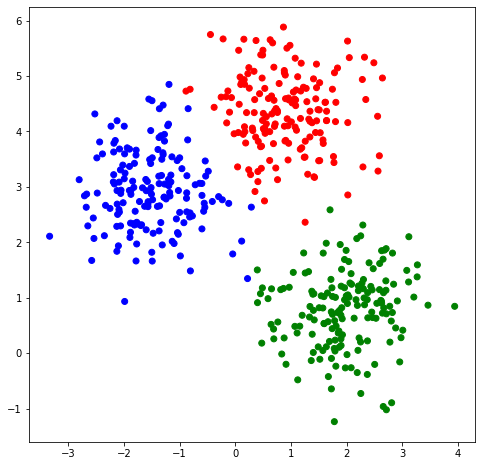

In [8]:
DATA_SET = np.load('kmeans_data/data.npy')
DATA_LABELS = np.load('kmeans_data/label.npy')

colors = ['red', 'green', 'blue', ]
cmap = matplotlib.colors.ListedColormap(colors)


fig = plt.figure(figsize=(8,8))
plt.scatter(DATA_SET[:,0], DATA_SET[:,1], c=DATA_LABELS, cmap = cmap)
plt.show()

## (30 pts) Task 1.2: K-Means Implementation

Implement k-means clustering algorithm by yourself using the number of iterations as the stopping condition. You can use built-in functions only for side-tasks such as norm computation, minimum element search and mean calculation, not for the clustering itself.

In [9]:
# Necessary functions

# Returns the Euclidean distance of a given point
# to a given center in a 3D space
def distance(center,point):
    return np.linalg.norm(center - point)


#def initialize_clusters

# Returns K initial random points considering
# max and min values in each dimension in order 
# not to pick centroids too far away.
def pick_random_points(data_set, number_of_points):
    _ , dimension = data_set.shape
    max_values = data_set.max(axis=0).reshape(dimension,1)
    min_values = data_set.min(axis=0).reshape(dimension,1)
    
    ranges = np.concatenate((min_values, max_values), axis = 1)
    starts = ranges[:, 0]
    widths = ranges[:, 1] - ranges[:, 0]
    
    np.random.seed(1);
    return starts + widths*np.random.random(size=(number_of_points, dimension))

# Given the Data Set, number of centroids (K), and the number of 
# iterations, applies k-means algorithm
def apply_k_means(data_set, K, number_of_iterations):
    number_of_data, dimension = data_set.shape
    centroids = pick_random_points(data_set, K)
    
    labels = np.zeros((number_of_data,), dtype=int) # Stores the cluster number of each data point
    
    while number_of_iterations > 0:
        distances = np.zeros(K) # Stores the distance between a data point and all centroids.
        sum_of_data_points_in_each_cluster = np.zeros((K, dimension)) # Stores sum of data points in cluster 
        total_number_of_points_in_each_cluster = np.zeros((K,1), dtype=int) 
        for i in range (number_of_data ): 
            distances = np.apply_along_axis(distance, 1, arr= centroids, point = data_set[i])
            label = np.argmin(distances)
            labels[i] = label
            sum_of_data_points_in_each_cluster[label] += data_set[i]
            total_number_of_points_in_each_cluster[label] += 1
        
        centroids = np.divide(sum_of_data_points_in_each_cluster, total_number_of_points_in_each_cluster)
        number_of_iterations -= 1
    return labels

    


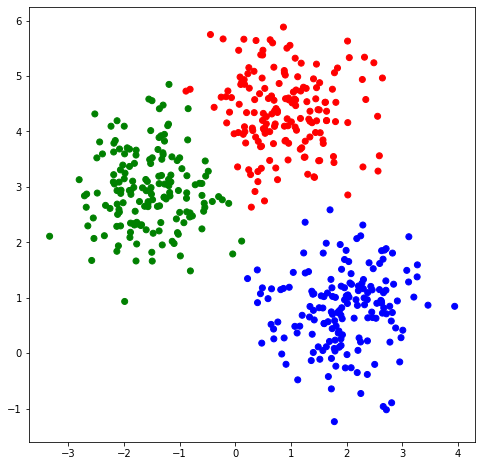

In [10]:
final_labels = apply_k_means(DATA_SET, 3, 5)

fig = plt.figure(figsize=(8,8))
plt.scatter(DATA_SET[:,0], DATA_SET[:,1], c=final_labels, cmap = cmap)
plt.show()

## (10 pts) Taks 1.3: Evaluation

Run k-means $9$ times with number of iterations $(N)$ $= \{1, 2, ..., 9\}$. Plot the final clustering assignments as a scatter plot for each run as 3x3 `matplotlib subplot`. Visually investigate the effect of the number of iterations on obtaining the optimal clustering and find the convergence point by comparing the plots with the one in Task 1.1. If the model does not converge at $9$ iterations, you can select $9$ other $N$ to effectively show the progress of the clustering.

For a fair comparison, start each run with the same initial random assignments. You can use `np.random.seed(1)` to this purpose.

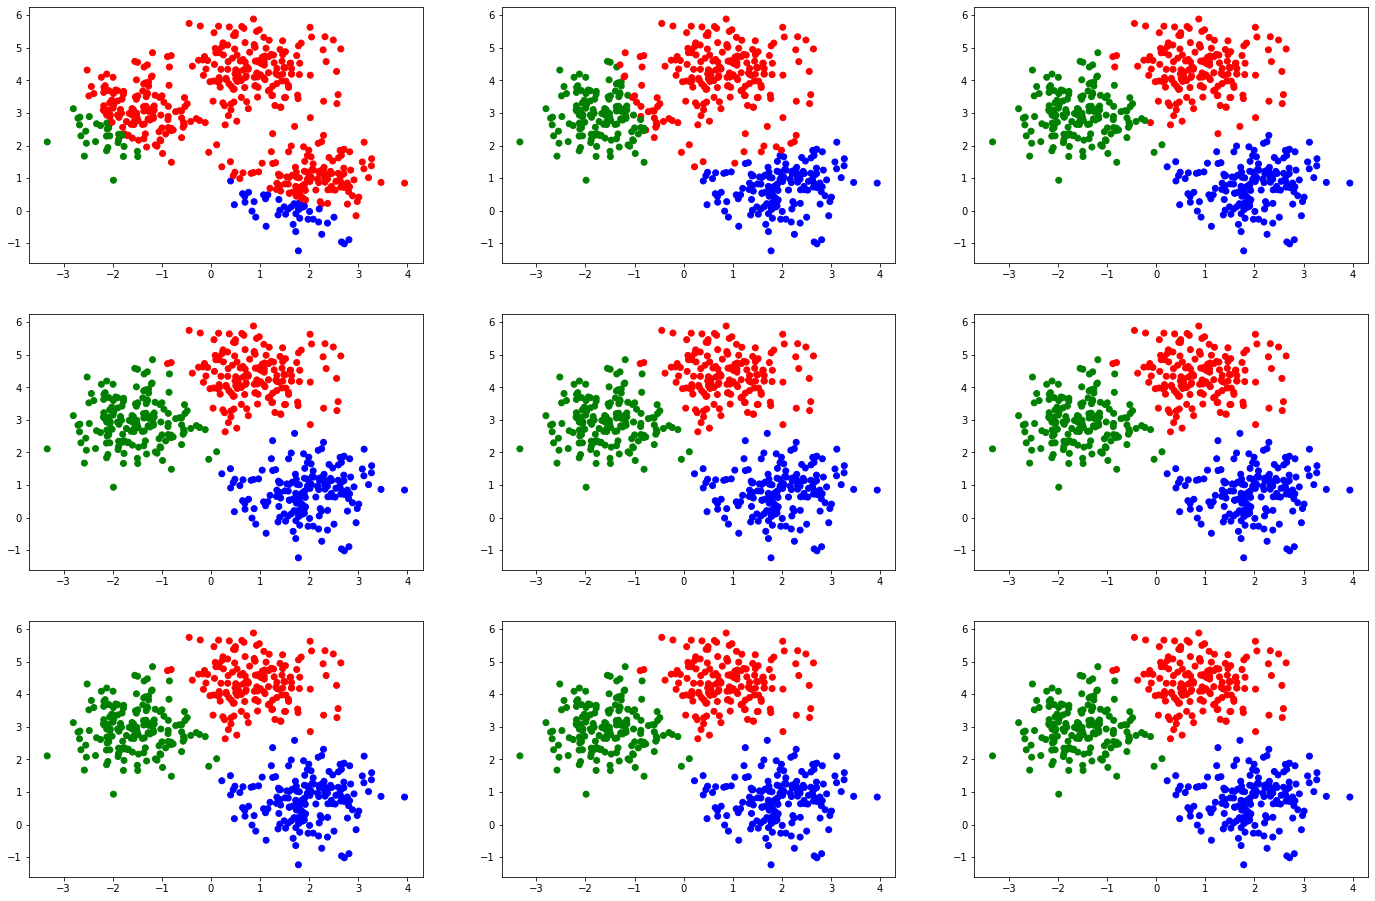

In [11]:
def run_k_means(data_set, number_of_clusters, range_start, range_finish):
    number_of_data, _ = data_set.shape
    total_number_of_runs = range_finish - range_start + 1
    final_labels = np.zeros((total_number_of_runs,number_of_data))
    x = 0;
    for i in range(range_start, range_finish + 1):
        final_labels[x] = apply_k_means(data_set, number_of_clusters, i)
        x += 1
        
    return final_labels

n_runs_labels = run_k_means(DATA_SET, 3, 1, 9)



plt.figure(figsize = (24,16))
for i in range(9):
    subplot = plt.subplot(3,3,i + 1)
    subplot.scatter(DATA_SET[:,0], DATA_SET[:,1], c=n_runs_labels[i], cmap = cmap)
    
plt.show()

# (50 pts) Task 2: Principal Component Analysis (PCA)

Please load the whole dataset in `USPS.mat` using the function `loadmat` in `Scipy.io`. The matrix $A$ contains all the images of size 16 by 16. Each of the 3000 rows in $A$ corresponds to the image of one handwritten digit (between 0 and 9).

## (30 pts) Task 2.1: PCA Implementation

Implement PCA and apply it to the data using $d = 50, 100, 200, 300$ principal components. You are not allowed to use an existing implementation. You can use existing packages for eigen-decomposition. **Do not forget to standardize the data before eigen-decomposition.**

## (15 pts) Task 2.2: Image Reconstruction

Reconstruct images using the selected principal components from Task 2.1

## (5 pts) Task 2.3: Evaluation

Visualize the reconstructed images for the images at indices $i = 0, 500, 1000, 2000$ for $d=50, 100, 200, 300$. Create a 4x5 subplot where the rows correspond to images at each index, first four columns correspond to reconstructed images using each $d$ and the last column is the raw image, i.e. before PCA. Comment on your results.